<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[boston house price dataset](https://github.com/selva86/datasets/blob/master/BostonHousing.csv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

df = pd.read_csv('BostonHousing.csv')
df.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


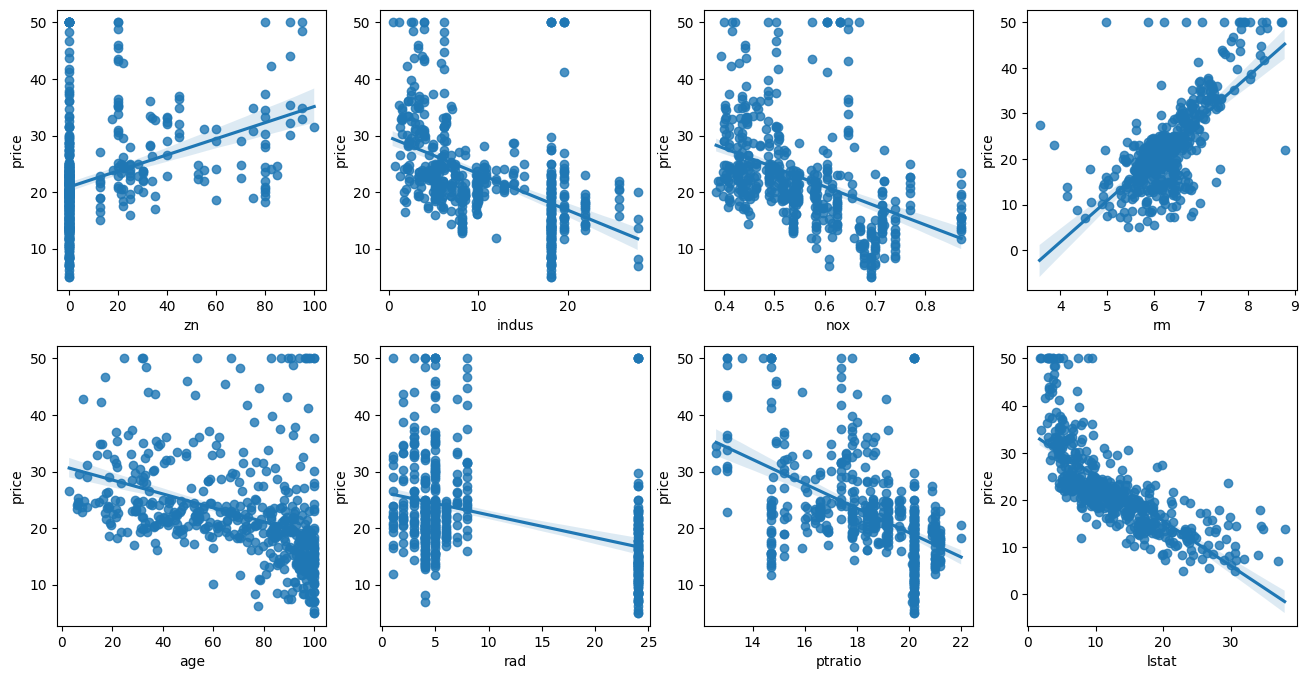

In [3]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
features = ['zn', 'indus', 'nox', 'rm', 'age', 'rad', 'ptratio', 'lstat']
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('price', axis=1, inplace=False)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(mse, rmse)
print(r2_score(y_test, pred))

17.296915907901962 4.158956107955692
0.7572263323138948


In [5]:
# 절편 값, 회귀 계수값
print(lr.intercept_, np.round(lr.coef_, 1))

40.995595172164826 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


회귀 계수를 구했을 때, nox가 (-) 값으로 너무 크다. >> 최적화 필요

In [12]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=df.iloc[:, :-1].columns)
coeff.sort_values(ascending=False)

rm          3.4
chas        3.0
rad         0.4
zn          0.1
indus       0.0
age         0.0
tax        -0.0
b           0.0
crim       -0.1
lstat      -0.6
ptratio    -0.9
dis        -1.7
nox       -19.8
dtype: float64

5개의 폴드 세트에서 cross_val_score()를 통해 교차 검증으로 mse와 rmse 측정
- 사이킷런은 RMSE를 제공하지 않으므로 MSE 수치를 RMSE로 변환해야 함
- scoring='neg_mean_squared_error' >> 음수값이므로 metric 평가 기준에서 좋은 모델이 되려면 (-)를 붙여야 함

In [13]:
from sklearn.model_selection import cross_val_score

y = df['price']
X = df.drop('price', axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('fold 개별 negative mse : ', np.round(neg_mse_scores, 2))
print('fold 개별 rmse : ', np.round(rmse_scores, 2))
print('평균 rmse : ', np.round(avg_rmse, 3))

fold 개별 negative mse :  [-12.46 -26.05 -33.07 -80.76 -33.31]
fold 개별 rmse :  [3.53 5.1  5.75 8.99 5.77]
평균 rmse :  5.829
